In [ ]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [ ]:
# Get data for the specified period and stocks
start = '2016-01-01'
end = '2017-01-01'
asset = yf.download('AAPL', start=start, end=end, group_by='column')
benchmark = yf.download('SPY', start=start, end=end, group_by='column')

In [ ]:
asset = asset['Close','AAPL']
benchmark = benchmark['Close','SPY']

In [32]:
asset.head()

Date
2016-01-04    23.860579
2016-01-05    23.262653
2016-01-06    22.807407
2016-01-07    21.844835
2016-01-08    21.960342
Name: (Close, AAPL), dtype: float64

In [34]:
benchmark.head()

Date
2016-01-04    172.372879
2016-01-05    172.664459
2016-01-06    170.486389
2016-01-07    166.396164
2016-01-08    164.569717
Name: (Close, SPY), dtype: float64

In [35]:
asset_ret = asset.pct_change()[1:]
bench_ret = benchmark.pct_change()[1:]

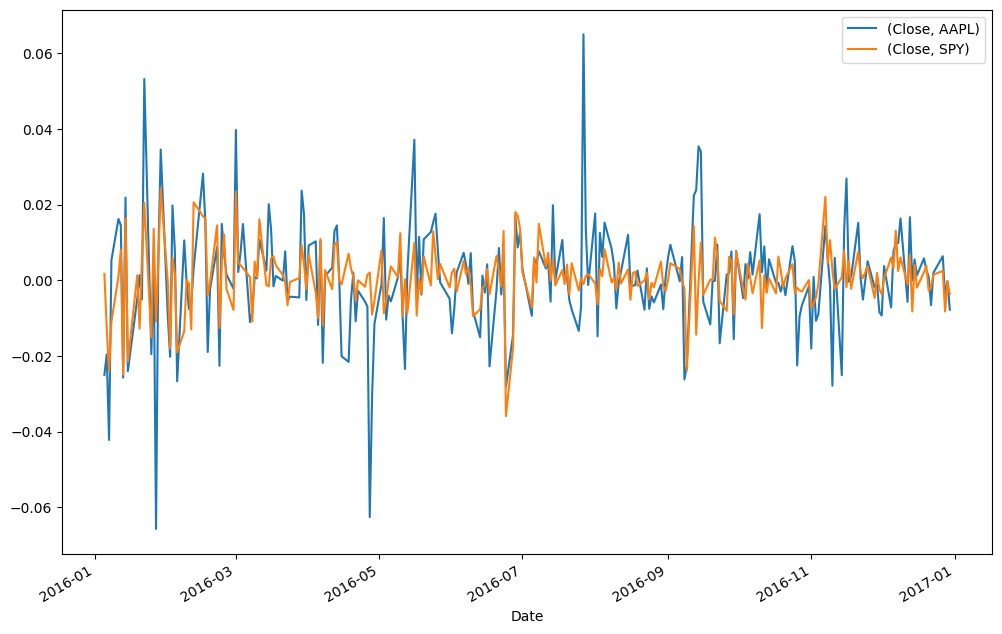

In [37]:
asset_ret.plot(figsize=(12,8))
bench_ret.plot()
plt.legend()

Text(0, 0.5, 'asset ret')

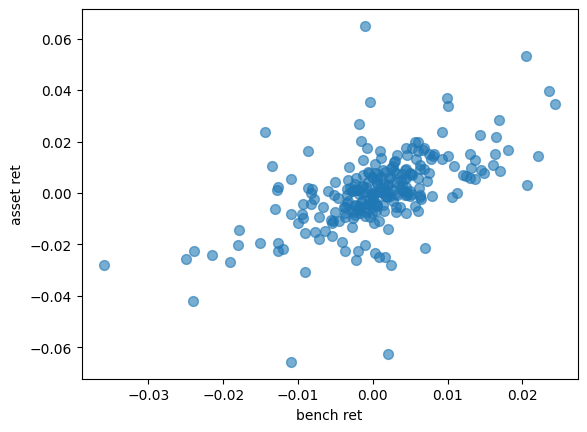

In [39]:
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)
plt.xlabel('bench ret')
plt.ylabel('asset ret')

In [40]:
AAPL = asset_ret.values
spy = bench_ret.values

In [ ]:
# Add a constant (column of 1s for intercept)
spy_constant = sm.add_constant(spy)
spy_constant

In [46]:
# Fit regression to data
model = regression.linear_model.OLS(AAPL,spy_constant).fit()

In [47]:
model.params

array([1.96365349e-05, 1.02359574e+00])

In [50]:
alpha,beta = model.params # c,m
print(f"alpha {alpha}, beta {beta}")

alpha 1.9636534938696583e-05, beta 1.0235957387086456


Text(0, 0.5, 'AAPL Ret')

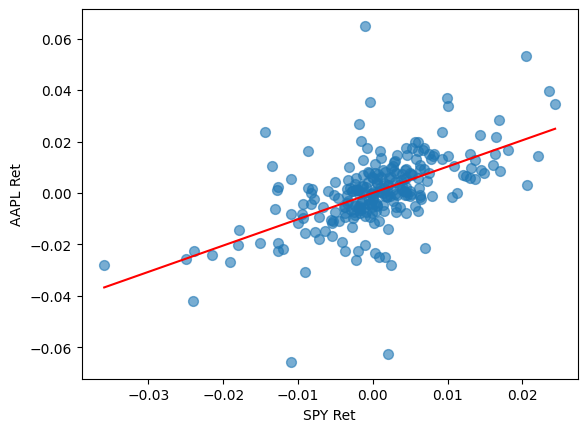

In [52]:
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()
spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line*beta + alpha
plt.plot(spy_line,y,'r')
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [55]:
hedged = -1*beta*bench_ret + asset_ret

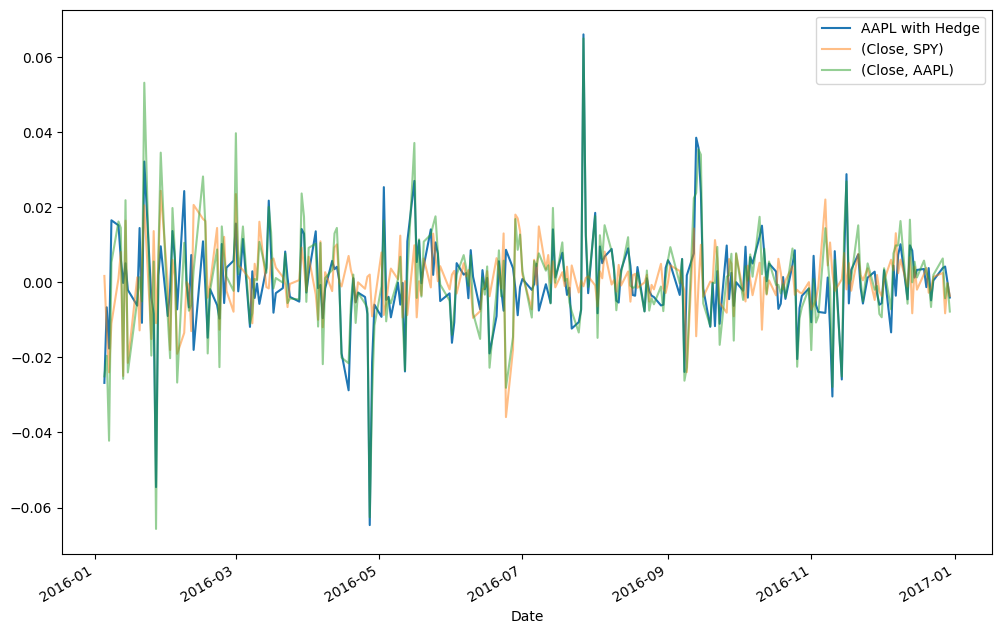

In [57]:
hedged.plot(label='AAPL with Hedge',figsize=(12,8))
bench_ret.plot(alpha=0.5)
asset_ret.plot(alpha=0.5)
plt.legend()

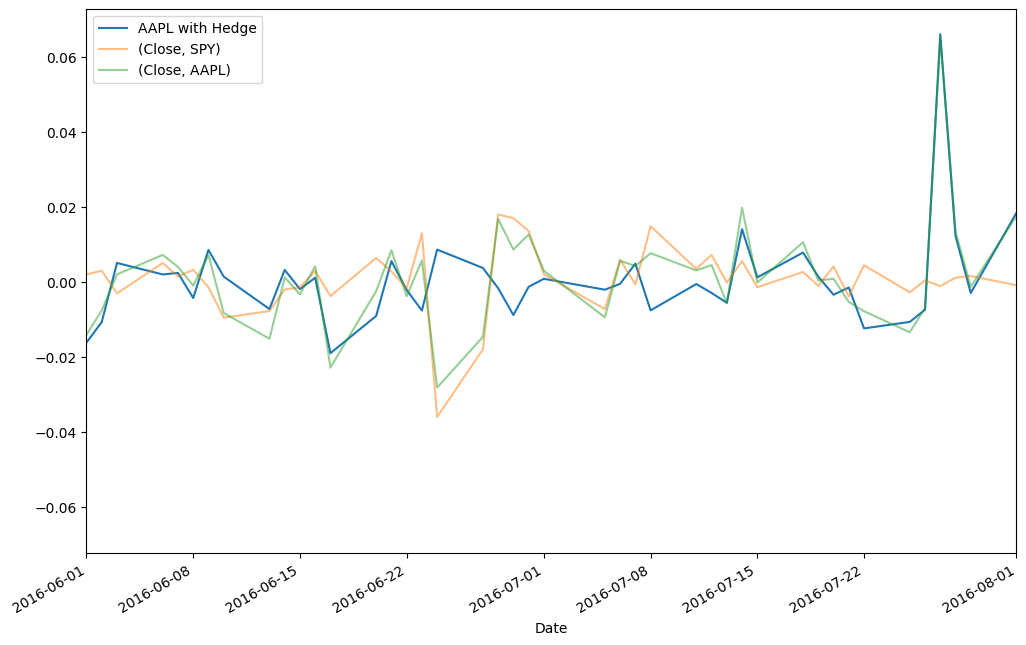

In [60]:
hedged.plot(label='AAPL with Hedge',figsize=(12,8))
bench_ret.plot(alpha=0.5)
asset_ret.plot(alpha=0.5)
plt.xlim(['2016-06-01','2016-08-01'])
plt.legend()

In [91]:
def alpha_beta(benchmark_ret,stock):
    benchmark_ret = sm.add_constant(benchmark_ret)
    model = regression.linear_model.OLS(stock,benchmark_ret).fit()
    return model.params[0], model.params[1]

In [82]:
# Get data for the specified period and stocks
start = '2016-01-01'
end = '2017-01-01'
asset2016 = yf.download('AAPL', start=start, end=end, group_by='column')
benchmark2016 = yf.download('SPY', start=start, end=end, group_by='column')
asset2016 = asset2016['Close','AAPL']
benchmark2016 = benchmark2016['Close','SPY']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [83]:
benchmark2016.head()

Date
2016-01-04    172.372879
2016-01-05    172.664459
2016-01-06    170.486389
2016-01-07    166.396164
2016-01-08    164.569717
Name: (Close, SPY), dtype: float64

In [84]:
asset2016.head()

Date
2016-01-04    23.860579
2016-01-05    23.262653
2016-01-06    22.807407
2016-01-07    21.844835
2016-01-08    21.960342
Name: (Close, AAPL), dtype: float64

In [106]:
asset_ret2016 = asset2016.pct_change()[1:]
benchmark_ret2016 = benchmark2016.pct_change()[1:]

aret_val = asset_ret2016.values
bret_val = benchmark_ret2016.values
alpha2016, beta2016 = alpha_beta(bret_val,aret_val)
print("2016 model params")
print(f"alpha {alpha2016}, beta {beta2016}")

2016 model params
alpha 1.9636534938696583e-05, beta 1.0235957387086456


## Creating a portfolio

In [108]:
portfolio = -1*beta2016 * benchmark_ret2016 + asset_ret2016

alpha, beta = alpha_beta(bret_val,portfolio)
print('Portfolio with Alphas and Betas:')
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

Portfolio with Alphas and Betas:
alpha: 1.9636534938696383e-05
beta: -2.209604027525458e-16


/tmp/ipykernel_267112/4252184582.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[0], model.params[1]


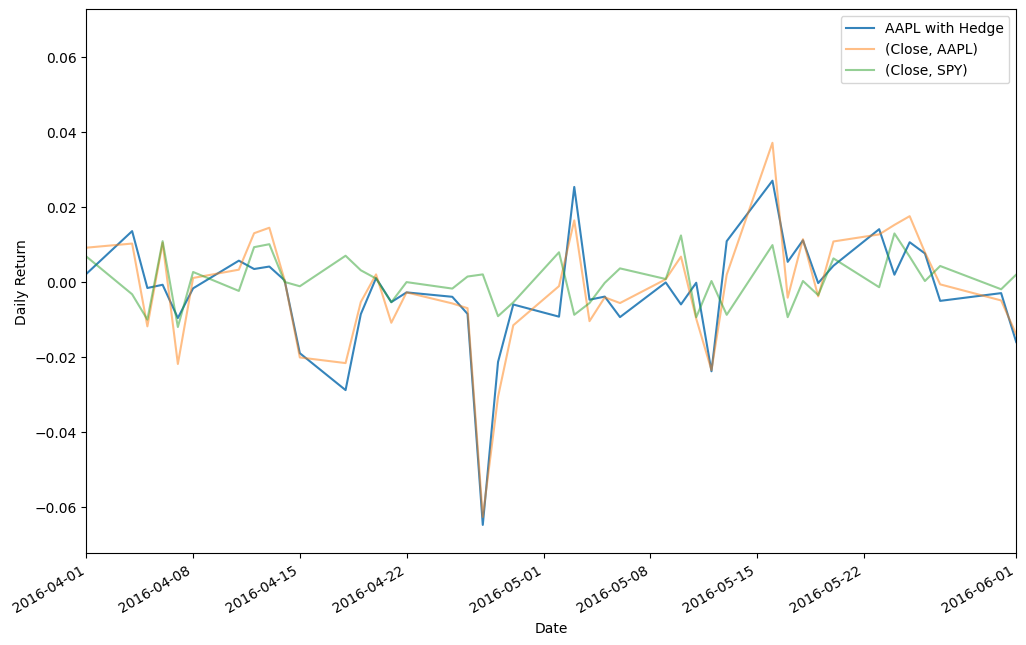

In [109]:
# Plot the returns of the portfolio as well as the asset by itself
portfolio.plot(alpha=0.9,label='AAPL with Hedge',figsize=(12,8))
asset_ret2016.plot(alpha=0.5);
benchmark_ret2016.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.xlim('2016-04-01','2016-06-01')
plt.legend();

In [110]:
portfolio.mean()

np.float64(1.9636534938695875e-05)

In [105]:
asset_ret2016.mean()

np.float64(0.0005735460359064788)

In [111]:
portfolio.std()

np.float64(0.012110844862087604)

In [112]:
asset_ret2016.std()

np.float64(0.014731114331719605)

In [115]:
# Get data for a different time frame:
start = '2017-01-01'
end = '2017-08-01'

asset2017 = yf.download('AAPL', start=start, end=end, group_by='column')
benchmark2017 = yf.download('SPY', start=start, end=end, group_by='column')
asset2017 = asset2017['Close','AAPL']
benchmark2017 = benchmark2017['Close','SPY']

asset_ret2017 = asset2017.pct_change()[1:]
benchmark_ret2017 = benchmark2017.pct_change()[1:]

aret_val = asset_ret2017.values
bret_val = benchmark_ret2017.values

alpha2017, beta2017 = alpha_beta(bret_val,aret_val)

print('2017 Based Figures')
print('alpha: ' + str(alpha2017))
print('beta: ' + str(beta2017))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

2017 Based Figures
alpha: 0.0009608001857274842
beta: 1.230175166479636


In [117]:
portfolio = -1* beta2016 * benchmark_ret2017 + asset_ret2017
alpha, beta = alpha_beta(benchmark_ret2017,portfolio)
print( 'Portfolio with Alphas and Betas Out of Sample:')
print( 'alpha: ' + str(alpha))
print('beta: ' + str(beta))

Portfolio with Alphas and Betas Out of Sample:
alpha: 0.0009608001857274843
beta: 0.20657942777099084


/tmp/ipykernel_267112/4252184582.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[0], model.params[1]


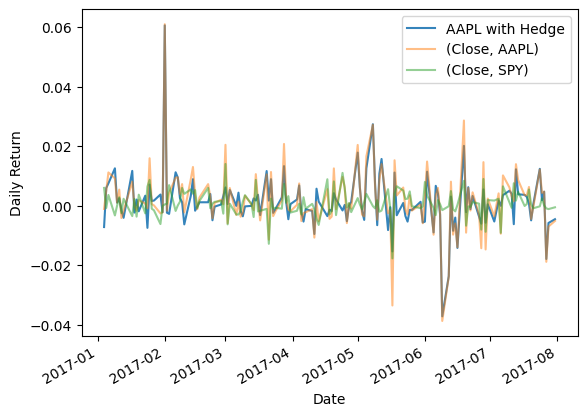

In [118]:
# Plot the returns of the portfolio as well as the asset by itself
portfolio.plot(alpha=0.9,label='AAPL with Hedge')
asset_ret2017.plot(alpha=0.5);
benchmark_ret2017.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();

In [119]:
portfolio.mean()

np.float64(0.0011069482848803604)

In [120]:
asset_ret2017.mean()

np.float64(0.0018311083482875018)

In [121]:
portfolio.std()

np.float64(0.009030678846007655)

In [122]:
asset_ret2017.std()

np.float64(0.010449485262173706)